In [1]:
# Importando Bibliotecas 

import os
import numpy as np


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
# Busar quantidade de imagens nas pastas para validacao

count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir + ' Pasta tem '+ str(len(files)) + ' Imagens')
    count = count + len(files)
print( 'Total de imagens ' + str(count) + ' Imagens') 



morango Pasta tem 250 Imagens
pessego Pasta tem 250 Imagens
roma Pasta tem 250 Imagens
Total de imagens 750 Imagens


In [3]:
base_dir = 'Images/'
img_size = 300
batch = 32 #quantidade de picthures por vez
epochs = 1
learning_rate = 0.0001

In [4]:
# Carregar as imagens em Arrays Dataset

#Treinamento e testes (teste nunca vistos pelo processo de treinamento)
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.75,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.25,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size,img_size))


Found 750 files belonging to 3 classes.
Using 188 files for training.
Found 750 files belonging to 3 classes.
Using 187 files for validation.


In [5]:
fruits_names = train_ds.class_names
fruits_names

['morango', 'pessego', 'roma']

In [6]:
import matplotlib.pyplot as plt

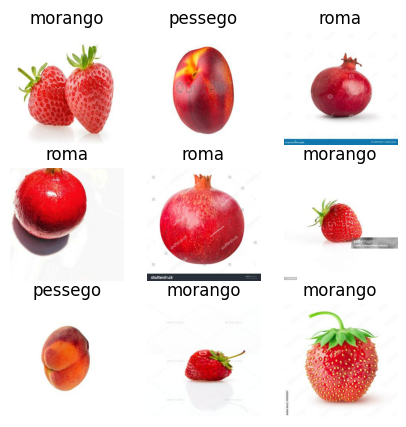

In [7]:
i = 0

plt.figure(figsize=(5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruits_names[labels[i]])
        plt.axis('off')
    

In [8]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\Rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Modelo de Criacao 

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])


In [10]:
#Compilar modelo

model.compile (optimizer = 'adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ['accuracy'])

In [11]:
print (model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
history = model.fit(train_ds, epochs = 500, validation_data = val_ds)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2318 - loss: 4.0621 - val_accuracy: 0.2995 - val_loss: 1.1917
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3948 - loss: 1.2159 - val_accuracy: 0.3048 - val_loss: 1.1789
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3732 - loss: 1.1440 - val_accuracy: 0.4011 - val_loss: 1.0511
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5523 - loss: 0.9838 - val_accuracy: 0.6364 - val_loss: 0.8461
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6685 - loss: 0.8034 - val_accuracy: 0.6684 - val_loss: 0.8796
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6338 - loss: 0.8283 - val_accuracy: 0.7166 - val_loss: 0.6981
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7613 - loss: 0.6106 - val_accuracy: 0.7968 - val_loss: 0.5548
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7834 - loss: 0.5203 - val_accuracy: 0.8182 - val_loss: 0.5344
Epoch 9

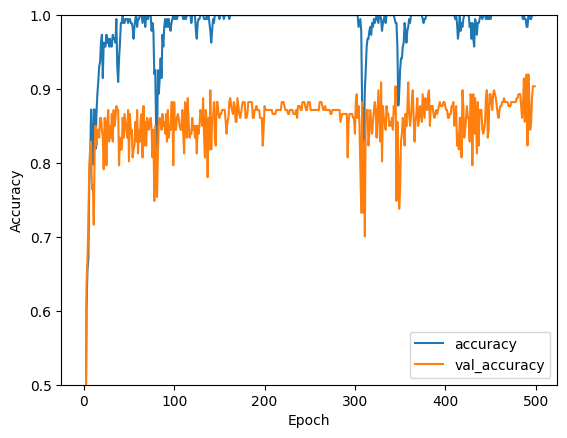

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [14]:
# SALVAR MODELO


model.save('Modelo_2_Normal.keras')